In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Geschwindigkeitüberwachung_Koeln_Gesamt_2017-2022_clean (2).csv",delimiter = ";")



<ipython-input-2-cca7eb780cbf>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Geschwindigkeitüberwachung_Koeln_Gesamt_2017-2022_clean (2).csv",delimiter = ";")


### Data Cleaning


In [ ]:
def NA_remove(df):
  df = df.dropna()
  return df

df_clean = NA_remove(df) # To clean the data for the next EDA's
df_clean.loc[:, 'ueberschreitung'] = df_clean['ueberschreitung'].astype(int)
df_clean.loc[:,'standort'] = pd.to_numeric(df_clean['standort'], errors='coerce')
df_clean.loc[:, 'standort'] = df_clean['standort'].astype(int)



# Non Graphical representation 2

In [ ]:
grouped = df_clean.groupby('standort')['ueberschreitung'].mean() #Data get Grouped by the variable "standort"
grouped_rounded = grouped.round(2)
print(grouped_rounded.nlargest(10))


standort
1252.0    27.00
1094.0    21.00
1603.0    19.00
2361.0    18.00
2434.0    17.50
6209.0    17.18
2425.0    16.52
395.0     16.50
667.0     16.40
1181.0    16.00
Name: ueberschreitung, dtype: float64


The following statistic shows the 10 highest average speed violations and their locations. Notably, location 1252 has the highest average speed violation with a value of 27.


# Data Preperation

In [ ]:
df_clean.loc[:,'vorfallsuhrzeit'] = pd.to_datetime(df_clean.loc[:,'vorfallsuhrzeit'], format='%H:%M:%S').dt.time
def zeit_in_tag_oder_nacht(uhrzeit):
    if uhrzeit >= pd.to_datetime('22:00:00', format='%H:%M:%S').time() or uhrzeit < pd.to_datetime('06:00:00', format='%H:%M:%S').time():
        return 'Night'
    else:
        return 'Day'
# The data is divided into day and night based on the time, with night being before 6 AM and after 10 PM.
df_clean.loc[:,'tag_nacht'] = df_clean.loc[:,'vorfallsuhrzeit'].apply(zeit_in_tag_oder_nacht)



<ipython-input-5-e3da06c88f13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'tag_nacht'] = df_clean.loc[:,'vorfallsuhrzeit'].apply(zeit_in_tag_oder_nacht)


In [ ]:
df_clean.loc[:,'ueberschreitung_>15'] = df_clean.loc[:,'ueberschreitung'].apply(lambda x: 1 if x > 15 else 0)
df_clean.loc[:,'ueberschreitung_>8'] = df_clean.loc[:,'ueberschreitung'].apply(lambda x: 1 if x > 8 else 0)


<ipython-input-6-3ac7db2cebb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'ueberschreitung_>15'] = df_clean.loc[:,'ueberschreitung'].apply(lambda x: 1 if x > 15 else 0)
<ipython-input-6-3ac7db2cebb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'ueberschreitung_>8'] = df_clean.loc[:,'ueberschreitung'].apply(lambda x: 1 if x > 8 else 0)


# Graphical representation 1

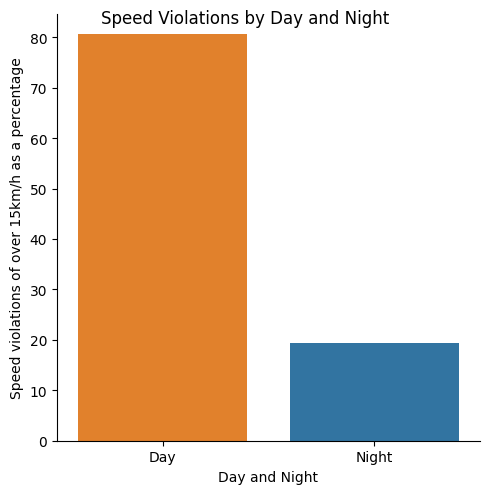

In [ ]:
df_filtered_1 = df_clean[df_clean['ueberschreitung_>15'] == 1]

g6 = sns.catplot(
      data = df_filtered_1,
      x = "tag_nacht",
      hue = "tag_nacht",
      kind = "count",
      stat = "percent",
      order = ["Day","Night"]
)
g6.fig.suptitle("Speed Violations by Day and Night")
g6.set(xlabel = "Day and Night",
       ylabel = "Speed violations of over 15km/h as a percentage")
plt.show()

In this chart, it can be seen that just over 80% of speed violations occur during the day. What's interesting is that one might expect such high violations to happen more at night, as younger, less experienced drivers, who tend to drive faster, are typically on the roads. However, the chart shows that most violations actually occur during the day.


# Graphical representation 2

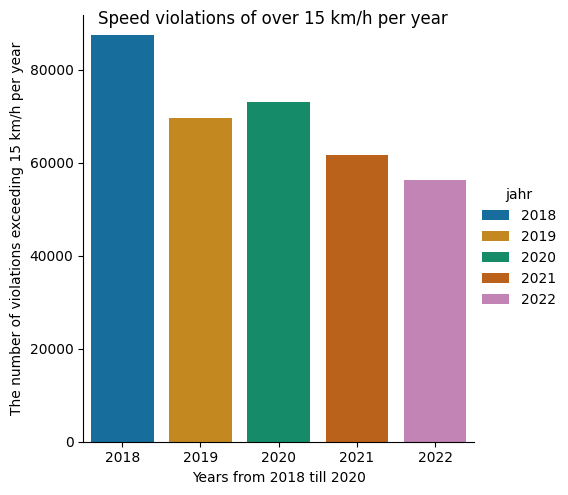

In [ ]:
df_filtered = df_clean[df_clean['ueberschreitung_>15'] == 1]
g1 = sns.catplot(
                data = df_filtered,
                x = "jahr",
                hue = "jahr",
                kind = "count",
                palette = "colorblind"
                )
g1.fig.suptitle("Speed violations of over 15 km/h per year")
g1.set(xlabel = "Years from 2018 till 2020",
       ylabel = "The number of violations exceeding 15 km/h per year")
plt.show()

In this plot, you can see the violations that exceeded 15 km/h, broken down by year. It is noticeable that the number of violations has significantly decreased from over 80,000 in 2018 to under 60,000 in 2022.

# Graphical representation 3

<ipython-input-16-2abb37c01d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'Herkunft'] = df_clean.loc[:,'kennzeichen'].apply(lambda x: 'Local' if x.startswith('K-') else 'Non-Local')


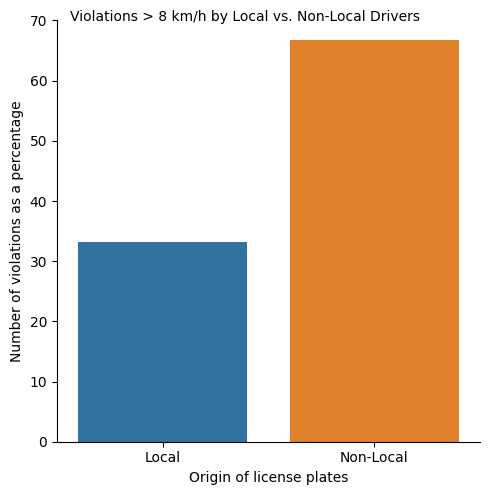

In [ ]:
df_clean.loc[:,'Herkunft'] = df_clean.loc[:,'kennzeichen'].apply(lambda x: 'Local' if x.startswith('K-') else 'Non-Local')
df_filtered_2 = df_clean[df_clean['ueberschreitung_>8'] == 1]
g2 = sns.catplot(
          data = df_filtered_2,
          x = "Herkunft",
          hue = "Herkunft",
          kind = "count",
          stat = "percent"
          )
g2.fig.suptitle("Violations > 8 km/h by Local vs. Non-Local Drivers",fontsize = "10")
g2.set(ylabel = "Number of violations as a percentage",
       xlabel = "Origin of license plates")
plt.show()

In the following chart, it can be seen that significantly more non-local drivers (Fremde) than local drivers (Kölner) cause violations exceeding 8 km/h. Just over 30% of the violations are caused by locals, while just under 70% are caused by non-locals. This is likely because non-local drivers are often unfamiliar with fixed speed cameras and the area, leading them to drive too fast.

# Graphical representation 4

In [ ]:
df_clean.loc[:,'quartal'] = pd.cut(df_clean.loc[:,'monat'], bins=[0, 3, 6, 9, 12], labels=['1. Quartal', '2. Quartal', '3. Quartal', '4. Quartal'], right=True)


<ipython-input-17-d6d0f13c3193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'quartal'] = pd.cut(df_clean.loc[:,'monat'], bins=[0, 3, 6, 9, 12], labels=['1. Quartal', '2. Quartal', '3. Quartal', '4. Quartal'], right=True)


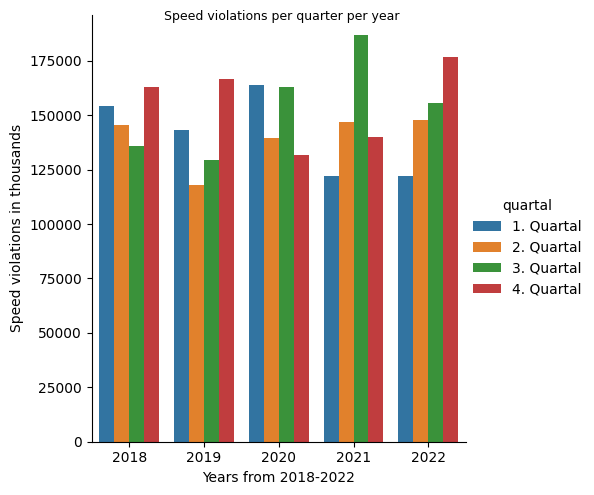

In [ ]:
g3 = sns.catplot(
              data = df_clean,
              hue = "quartal",
              x = "jahr",
              kind = "count"
                )
g3.fig.suptitle("Speed violations per quarter per year", fontsize = "9")
g3.set(ylabel = "Speed violations in thousands",
       xlabel = "Years from 2018-2022")
plt.show()

In the following chart, you can see the speed violations for each year, broken down by quarters. Notably, the third quarter of 2021 saw a significant number of speed violations. Otherwise, it is apparent that the highest number of speed violations often occur in the fourth quarter of each year.

# Graphical representation 5

<ipython-input-19-dc1b4d49f3b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'Fahrzeugart_auto'] = df_clean.loc[:,'fahrzeugart'].apply(lambda x: 'Car' if x == "04a" else 'Non-Car')


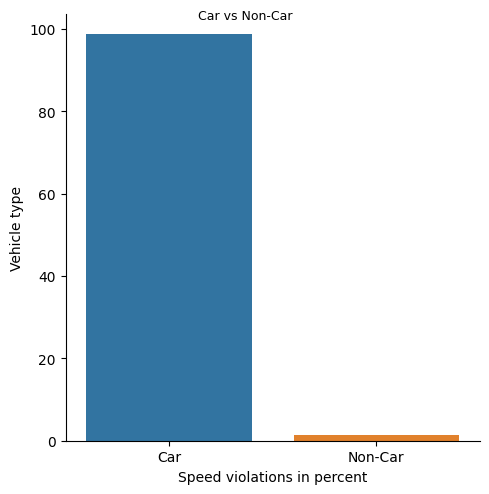

In [ ]:
df_clean.loc[:,'Fahrzeugart_auto'] = df_clean.loc[:,'fahrzeugart'].apply(lambda x: 'Car' if x == "04a" else 'Non-Car')

g4 = sns.catplot(
    data = df_clean,
    x = "Fahrzeugart_auto",
    hue = "Fahrzeugart_auto",
    kind = "count",
    stat = "percent"
)
g4.fig.suptitle("Car vs Non-Car", fontsize ="9")
g4.set(xlabel = "Speed violations in percent",
       ylabel = "Vehicle type")

In this chart, it can be seen that most speed violations are committed by car drivers, accounting for over 90%. While cars are the most common type of vehicle on the roads, it is still interesting that so many speed violations are caused by cars alone, as it doesn't always feel like they dominate the traffic in this way. It is also often assumed that motorcyclists drive the fastest. However, this cannot be confirmed by the data, as many speed cameras only capture violations from the front.

# Graphical representation 6

In [ ]:
df_clean.loc[:,'Geschwindigkeit_>90'] = df_clean.loc[:,'geschwindigkeit'].apply(lambda x: "over 90km/h" if x >= 90  else "under 90km/h")


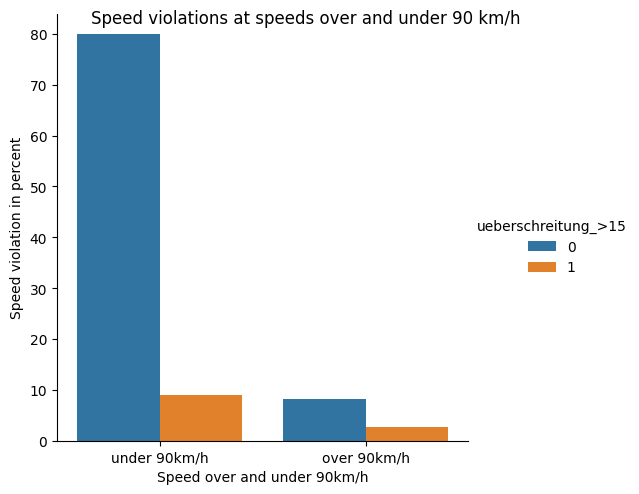

In [ ]:
g5 = sns.catplot(
    data = df_clean,
    x= "Geschwindigkeit_>90",
    hue = "ueberschreitung_>15",
    kind = "count",
    stat = "percent",
    legend = "full"
)
g5.fig.suptitle("Speed violations at speeds over and under 90 km/h")
g5.set(ylabel = "Speed violation in percent",
       xlabel = "Speed over and under 90km/h")


The last chart shows the percentage of times the speed limit was exceeded by more than 15 km/h when driving at speeds over 90 km/h. One might assume that at such high speeds, the likelihood of exceeding the speed limit by a significant margin is much higher. However, this is not the case; only a small portion of those driving over 90 km/h are driving more than 15 km/h over the limit.
